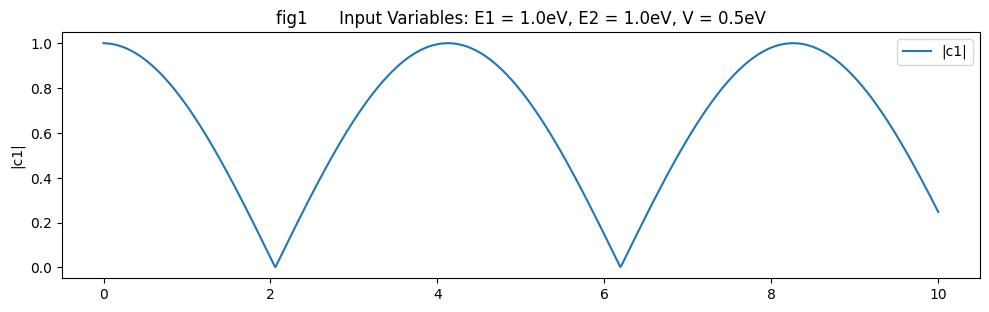

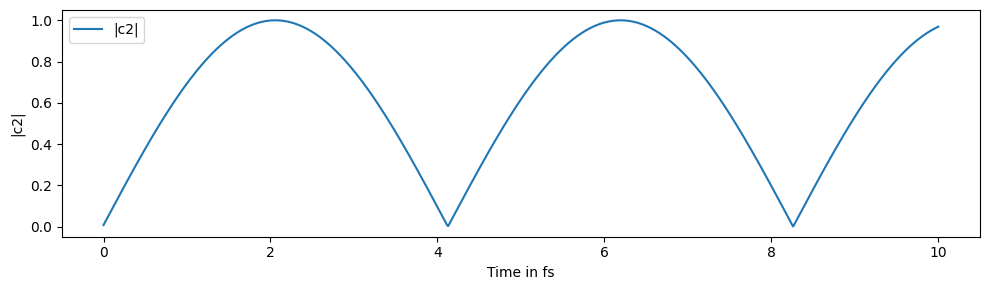

In [33]:
import numpy as np
import matplotlib.pyplot as plt

hbar = 0.6582119514

def read_input_file(file_path):
  with open(file_path, 'r') as file:
    lines = [line for line in file if not line.startswith('#')]
    E1 = float(lines[0].strip())
    E2 = float(lines[1].strip())
    V = float(lines[2].strip())
  return E1, E2, V

c0 = np.array([1, 0])
E1, E2, V = read_input_file('ex2-input.txt')
H = np.array([[E1, V], [V, E2]])

def rk4(t, psi, H, h):
    
    def schrodinger_eq(t, psi, H):
        return -1j * np.dot(H, psi) / hbar
    
    k1 = h * schrodinger_eq(t, psi, H)
    k2 = h * schrodinger_eq(t + h/2, psi + k1/2, H)
    k3 = h * schrodinger_eq(t + h/2, psi + k2/2, H)
    k4 = h * schrodinger_eq(t + h, psi + k3, H)
    return psi + (k1 + 2*k2 + 2*k3 + k4) / 6

# time grid
t_max = 10
h = 0.01
num_steps = int((t_max) / h) + 1
T = np.linspace(0, t_max, num_steps)

Psi = []
psi = c0
for i, t in enumerate(T):
    psi = rk4(t, psi, H, h)
    Psi.append(psi)

# c1
plt.figure(figsize=(10, 3))
plt.plot(T, np.abs(np.array(Psi)[:, 0]), label='|c1|')
plt.ylabel('|c1|')
plt.legend()
plt.tight_layout()
plt.title(f'fig1      Input Variables: E1 = {E1}eV, E2 = {E2}eV, V = {V}eV')
plt.show()

# c2
plt.figure(figsize=(10, 3))
plt.plot(T, np.abs(np.array(Psi)[:, 1]), label='|c2|')
plt.xlabel('Time in fs')
plt.ylabel('|c2|')
plt.legend()
plt.tight_layout()
plt.show()

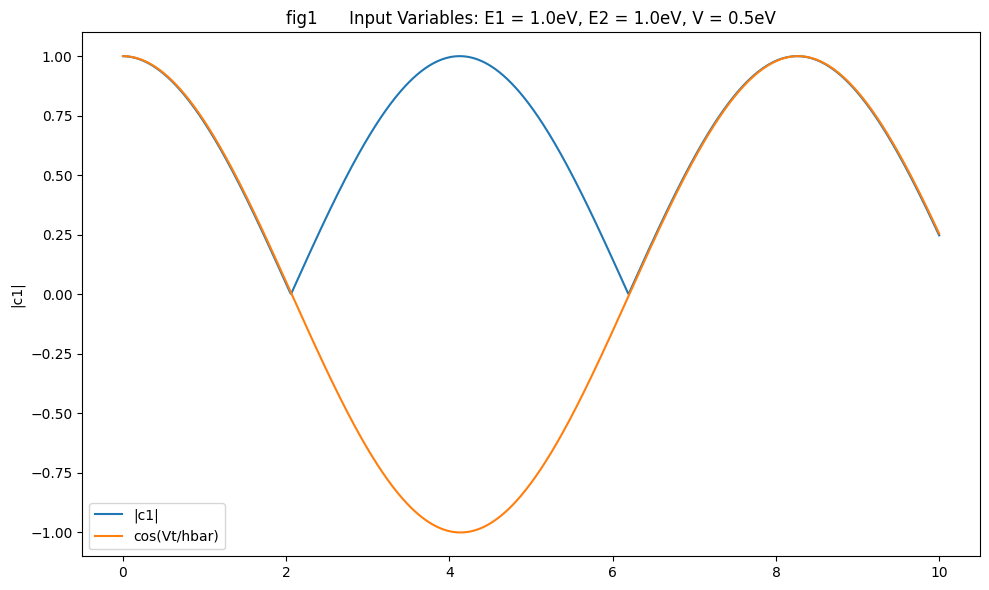

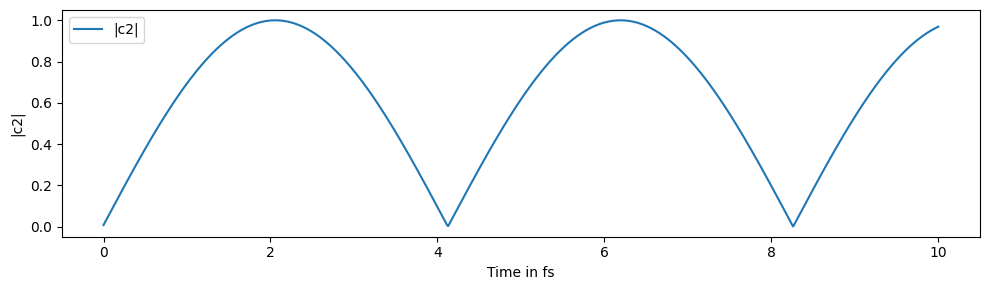

In [11]:
# E1 = E2

# c1
plt.figure(figsize=(10, 6))
plt.title(f'fig1      Input Variables: E1 = {E1}eV, E2 = {E2}eV, V = {V}eV')
plt.plot(T, np.abs(np.array(Psi)[:, 0]), label='|c1|')
plt.plot(T, np.cos(V * T / hbar), label='cos(Vt/hbar)')
plt.ylabel('|c1|')
plt.legend()
plt.tight_layout()
plt.show()

# c2
plt.figure(figsize=(10, 3))
plt.plot(T, np.abs(np.array(Psi)[:, 1]), label='|c2|')
plt.xlabel('Time in fs')
plt.ylabel('|c2|')
plt.legend()
plt.tight_layout()
plt.show()

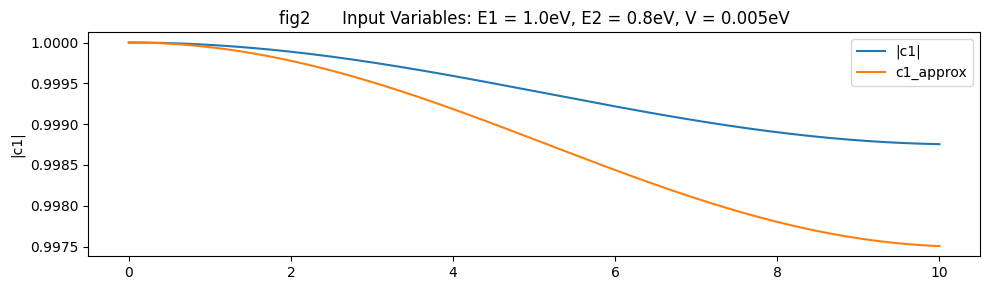

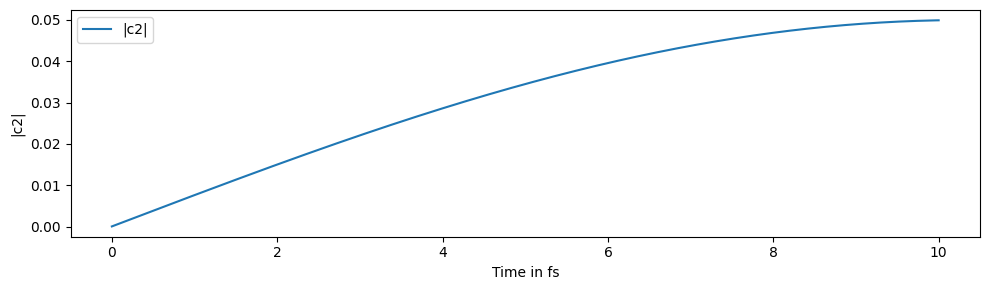

In [20]:
# E1 - E2 >> V

plt.figure(figsize=(10, 3))

plt.title(f'fig2      Input Variables: E1 = {E1}eV, E2 = {E2}eV, V = {V}eV')

c1_approx = 1 - 2 * V**2 / (E1 - E2)**2 + 2 * V**2 / (E1 - E2)**2 * np.cos((E1 - E2) * T / hbar)
# c1
plt.plot(T, np.abs(np.array(Psi)[:, 0]), label='|c1|')
plt.plot(T, c1_approx, label='c1_approx')
plt.ylabel('|c1|')
plt.legend()
plt.tight_layout()
plt.show()

# c2
plt.figure(figsize=(10, 3))
plt.plot(T, np.abs(np.array(Psi)[:, 1]), label='|c2|')
plt.xlabel('Time in fs')
plt.ylabel('|c2|')
plt.legend()
plt.tight_layout()
plt.show()

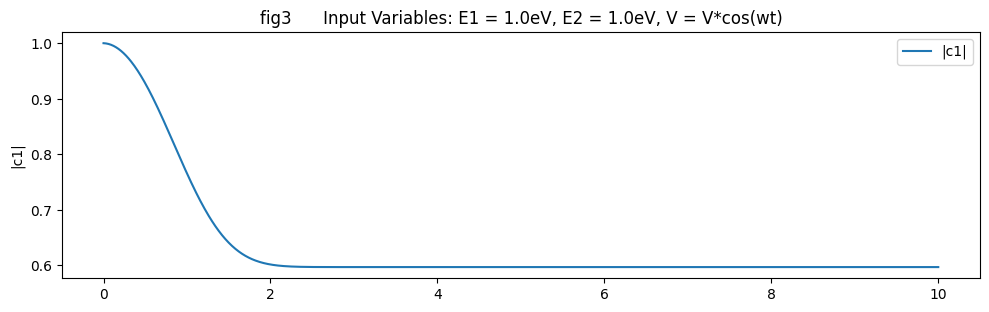

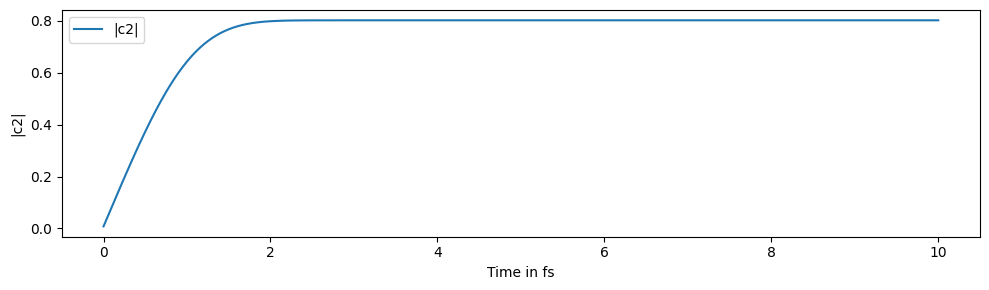

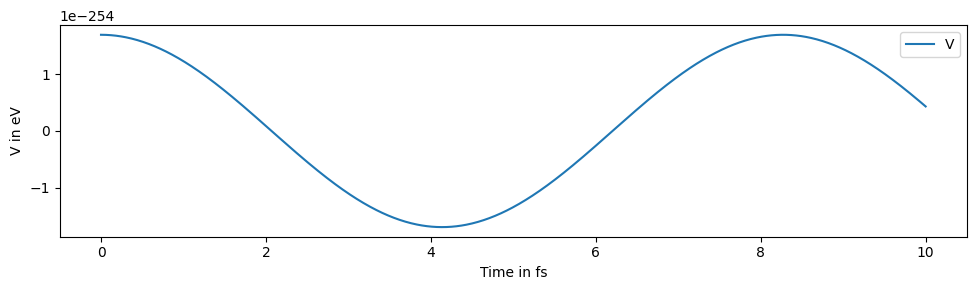

In [34]:
# V = V0*cos(wt)

H = np.array([[E1, V], [V, E2]])

def rk4(t, psi, H, h):
    
    def schrodinger_eq(t, psi, H):
        return -1j * np.dot(H, psi) / hbar
    
    k1 = h * schrodinger_eq(t, psi, H)
    k2 = h * schrodinger_eq(t + h/2, psi + k1/2, H)
    k3 = h * schrodinger_eq(t + h/2, psi + k2/2, H)
    k4 = h * schrodinger_eq(t + h, psi + k3, H)
    return psi + (k1 + 2*k2 + 2*k3 + k4) / 6

# time grid
t_max = 10
h = 0.01
num_steps = int((t_max) / h) + 1
T = np.linspace(0, t_max, num_steps)

Psi = []
psi = c0
for i, t in enumerate(T):
    V = V * np.cos(0.1 * t / hbar)
    H = np.array([[E1, V], [V, E2]])
    psi = rk4(t, psi, H, h)
    Psi.append(psi)

# c1
plt.figure(figsize=(10, 3))
plt.plot(T, np.abs(np.array(Psi)[:, 0]), label='|c1|')
plt.ylabel('|c1|')
plt.legend()
plt.tight_layout()
plt.title(f'fig3      Input Variables: E1 = {E1}eV, E2 = {E2}eV, V = V*cos(wt)')
plt.show()

# c2
plt.figure(figsize=(10, 3))
plt.plot(T, np.abs(np.array(Psi)[:, 1]), label='|c2|')
plt.xlabel('Time in fs')
plt.ylabel('|c2|')
plt.legend()
plt.tight_layout()
plt.show()

#V
plt.figure(figsize=(10, 3))
plt.plot(T, V * np.cos(0.5 * T / hbar), label='V')
plt.xlabel('Time in fs')
plt.ylabel('V in eV')
plt.legend()
plt.tight_layout()
plt.show()